# Anomaly detection

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
from scipy import stats
from sklearn.metrics import f1_score
 
data = loadmat('ex8data1.mat')  
X = data['X']   
y = data['yval']

In [2]:
print(f'Data has {X.shape[1]} features and {X.shape[0]} examples.')

Data has 2 features and 307 examples.


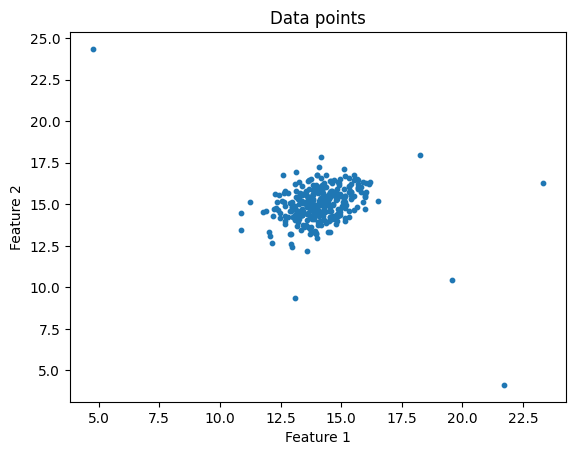

In [3]:
x1 = X[:, 0]
x2 = X[:, 1]
plt.scatter(x1, x2, s=10)
plt.title('Data points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


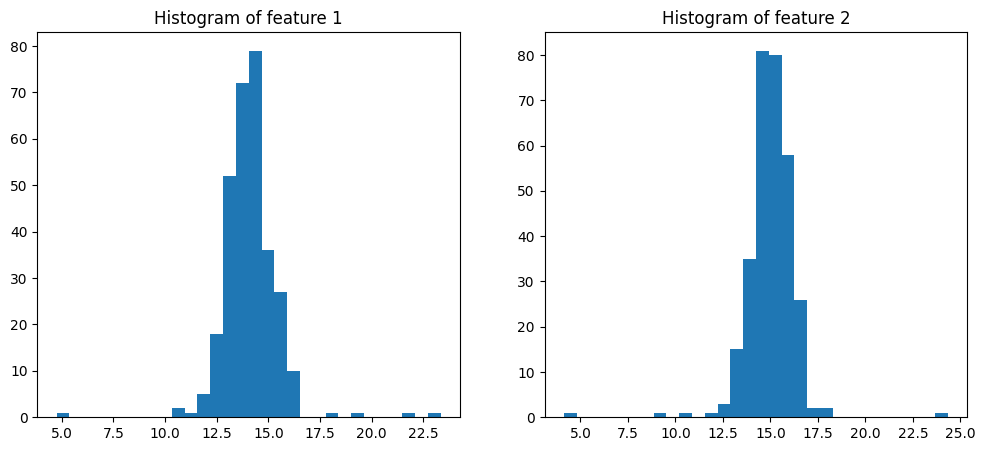

In [4]:
plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(x1, bins=30, label='Feature 1')
plt.title('Histogram of feature 1')
plt.subplot(1, 2, 2)
plt.hist(x2, bins=30, label='Feature 2')
plt.title('Histogram of feature 2')

plt.show()

In [5]:
def estimate_gaussian(X):  
  mu = np.mean(X, axis=0)
  sigma = np.std(X, axis=0)
  return mu, sigma

In [6]:
gaussian_parameters = estimate_gaussian(X)
print(gaussian_parameters)

(array([14.11222578, 14.99771051]), array([1.35374717, 1.3075723 ]))


In [7]:
Xval = data['Xval']  
yval = data['yval']
print(Xval.shape)

(307, 2)


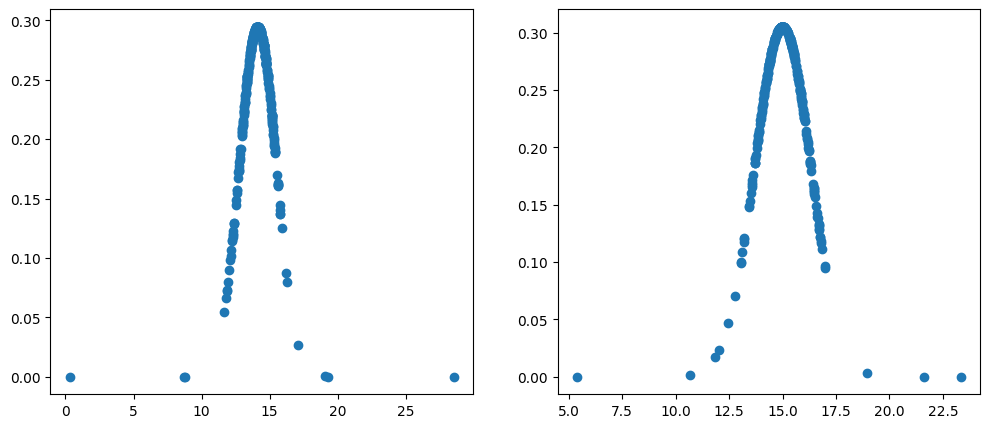

In [8]:
pval = stats.norm.pdf(Xval, loc=gaussian_parameters[0], scale=gaussian_parameters[1])
plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(Xval[:,0], pval[:, 0])
plt.subplot(1, 2, 2)
plt.scatter(Xval[:,1], pval[:, 1])
plt.show()

In [9]:
def select_threshold(pval, yval, p_min=0.0, p_max=0.3, n=1000):
  best_epsilon = 0
  best_f1 = 0
  f1 = 0
  for threshold in np.linspace(p_min, p_max, n):
    y_pred = (pval < threshold).astype(int)
    f1 = f1_score(yval, y_pred)
    if f1 > best_f1:
      best_f1 = f1
      best_epsilon = threshold
  return best_epsilon, best_f1

In [10]:
print(f'{yval.shape}')
print(f'{pval.shape}')

(307, 1)
(307, 2)


In [11]:
threshold1, _ = select_threshold(pval[:,0], yval)
threshold2, _ = select_threshold(pval[:,1], yval)

In [12]:
print(f'threshold1: {threshold1:.5f}, \nthreshold2: {threshold2:.5f}.')

threshold1: 0.00060, 
threshold2: 0.02342.


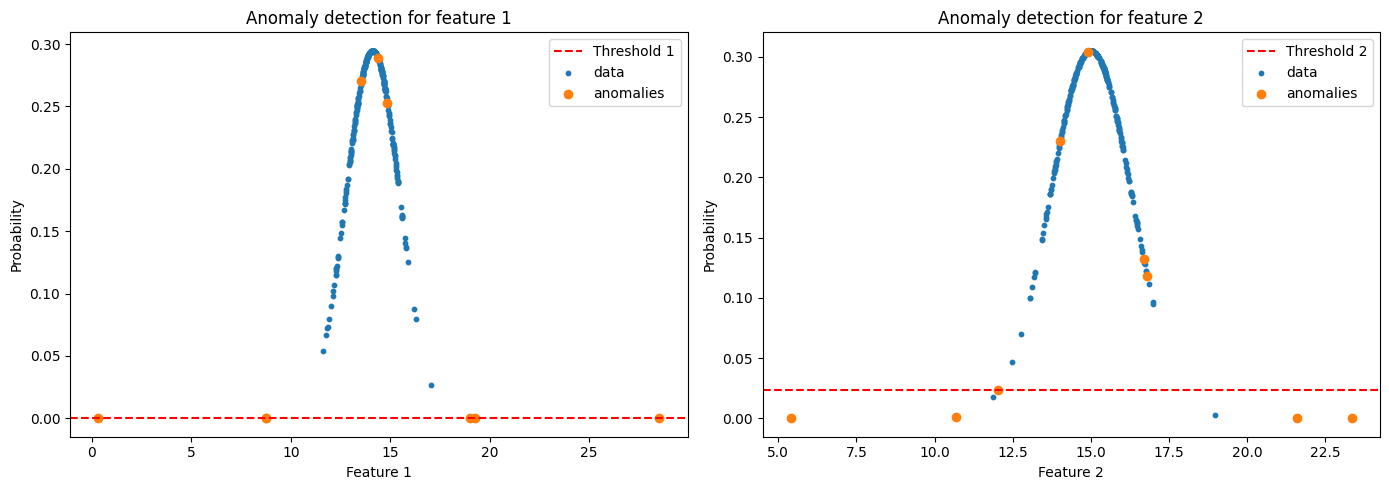

In [13]:
anomaly_idx = np.where(yval == 1)[0]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

normal_color = 'tab:blue'
anomaly_color = 'tab:orange'
threshold_color = 'red'

# feature 1
axes[0].axhline(y=threshold1, color=threshold_color, linestyle='--', label='Threshold 1')
axes[0].scatter(Xval[:, 0], pval[:, 0], c=normal_color, label='data', s=10)
axes[0].scatter(Xval[anomaly_idx, 0], pval[anomaly_idx, 0], c=anomaly_color, label='anomalies')
axes[0].set_title('Anomaly detection for feature 1')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Probability')
axes[0].legend()

# feature 2
axes[1].axhline(y=threshold2, color=threshold_color, linestyle='--', label='Threshold 2')
axes[1].scatter(Xval[:, 1], pval[:, 1], c=normal_color, label='data', s=10)
axes[1].scatter(Xval[anomaly_idx, 1], pval[anomaly_idx, 1], c=anomaly_color, label='anomalies')
axes[1].set_title('Anomaly detection for feature 2')
axes[1].set_xlabel('Feature 2')
axes[1].set_ylabel('Probability')
axes[1].legend()

plt.tight_layout()
plt.show()

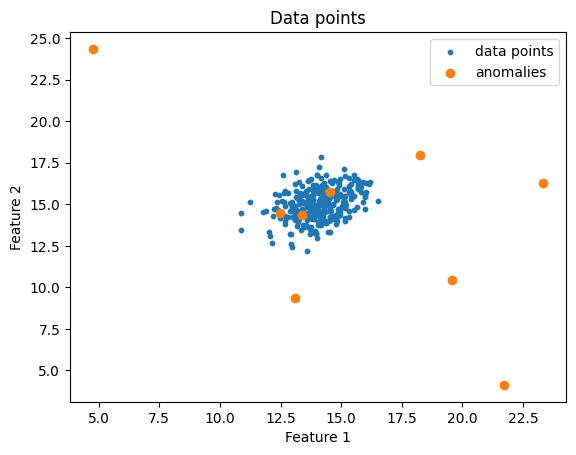

In [14]:
detected_anomaly_indices = np.where((pval[:, 0] < threshold1) | (pval[:, 1] < threshold2))[0]

x1 = X[:, 0]
x2 = X[:, 1]
plt.scatter(x1, x2, c=normal_color, label='data points', s=10)
plt.scatter(x1[detected_anomaly_indices], x2[detected_anomaly_indices], c=anomaly_color, label='anomalies')
plt.title('Data points')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
